<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/imdb_movie_review_binary_classification_keras_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Movie Review - Binary Classification using IMDB library**

**1. Data import and review**

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras import optimizers
from keras import losses
from keras import metrics

Using TensorFlow backend.


In [0]:
# Build class for formatting
class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
# Import data
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [31]:
# Review imported data
print(color.BOLD+'train_data type:'+color.END, type(train_data), 'with ndim:', train_data.ndim, 'and length:', 
      len(train_data), 'Shape:', train_data.shape)
print(color.BOLD+'train_labels type:'+color.END, type(train_labels), 'with ndim:', train_labels.ndim, 'and length:', 
      len(train_labels), 'Shape:', train_labels.shape)
print(color.BOLD+'test_data type:'+color.END, type(test_data), 'with ndim:', test_data.ndim, 'and length:', 
      len(test_data), 'Shape:', test_data.shape)
print(color.BOLD+'test_labels type:'+color.END, type(test_labels), 'with ndim:', test_labels.ndim, 'and length:', 
      len(test_labels), 'Shape:', test_labels.shape, '\n')

display('train_data slice:', train_data[0:5])
print('\n')
display('train_labels:', train_labels[0:5])
print('\n')
display('test_data slice:', test_data[0:5])
print('\n')
display('test_labels:', test_labels[0:5])

train_data type: <class 'numpy.ndarray'> with ndim: 1 and length: 25000 Shape: (25000,)
train_labels type: <class 'numpy.ndarray'> with ndim: 1 and length: 25000 Shape: (25000,)
test_data type: <class 'numpy.ndarray'> with ndim: 1 and length: 25000 Shape: (25000,)
test_labels type: <class 'numpy.ndarray'> with ndim: 1 and length: 25000 Shape: (25000,) 



'train_data slice:'

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

'train_labels:'

array([1, 0, 0, 1, 0])

'test_data slice:'

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

'test_labels:'

array([0, 1, 1, 0, 1])

In [0]:
# De-code data into English
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [79]:
# Review data in English
print(color.UNDERLINE+color.BOLD+'word_index'+color.END)
print('word_index type:', type(word_index), 'with length:', len(word_index))
print('First 5 keys:', list(word_index.keys())[0:5], 'with first 5 values:', list(word_index.values())[0:5])

print(color.UNDERLINE+color.BOLD+'\nreverse_word_index'+color.END)
print('reverse_word_index type:', type(reverse_word_index), 'with length:', len(reverse_word_index))
print('First 5 keys:', list(reverse_word_index.keys())[0:5], 'with first 5 values:', list(reverse_word_index.values())[0:5])

print(color.UNDERLINE+color.BOLD+'\ndecoded_review'+color.END)
print('decoded_review type:', type(decoded_review), 'with length:', len(decoded_review))
print('Beginning of string:', decoded_review[0:30])

word_index
word_index type: <class 'dict'> with length: 88584
First 5 keys: ['fawn', 'tsukino', 'nunnery', 'sonja', 'vani'] with first 5 values: [34701, 52006, 52007, 16816, 63951]

reverse_word_index
reverse_word_index type: <class 'dict'> with length: 88584
First 5 keys: [34701, 52006, 52007, 16816, 63951] with first 5 values: ['fawn', 'tsukino', 'nunnery', 'sonja', 'vani']

decoded_review
decoded_review type: <class 'str'> with length: 896
Beginning of string: ?thisfilmwasjustbrilliantcasti


In [0]:
# Create vectorise function
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1.
  return results

In [0]:
# Vectorize data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [82]:
# Review vectorized data
print('x_train type:', type(x_train), 'with ndim:', x_train.ndim, 'with dtype:', x_train.dtype, 'with length:', len(x_train), 'with shape:', x_train.shape)
print('y_train type:', type(y_train), 'with ndim:', y_train.ndim, 'with dtype:', y_train.dtype, 'with length:', len(y_train), 'with shape:', y_train.shape)
print('x_test type:', type(x_test), 'with ndim:', x_test.ndim, 'with dtype:', x_test.dtype, 'with length:', len(x_test), 'with shape:', x_test.shape)
print('y_test type:', type(y_test), 'with ndim:', y_test.ndim, 'with dtype:', y_test.dtype, 'with length:', len(y_test), 'with shape:', y_test.shape, '\n')

display('x_train slice:', x_train[0:5])
print('\n')
display('x_test slice:', x_test[0:5])

x_train type: <class 'numpy.ndarray'> with ndim: 2 with dtype: float64 with length: 25000 with shape: (25000, 10000)
y_train type: <class 'numpy.ndarray'> with ndim: 1 with dtype: float32 with length: 25000 with shape: (25000,)
x_test type: <class 'numpy.ndarray'> with ndim: 2 with dtype: float64 with length: 25000 with shape: (25000, 10000)
y_test type: <class 'numpy.ndarray'> with ndim: 1 with dtype: float32 with length: 25000 with shape: (25000,) 



'x_train slice:'

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

'x_test slice:'

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

**2. Neural Network construction**

In [0]:
# Model creation
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# Compile model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 

# Alternative ?
# model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [0]:
# Prepare validation data
x_val = x_train[:10000]
partial_x_train =  x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [88]:
# Review validation data
display('x_val slice:', x_val[0:5])
print('\n')
display('partial_x_train slice:', partial_x_train[0:5])
print('\n')
display('y_val slice:', y_val[0:5])
print('\n')
display('partial_y_train slice:', partial_y_train[0:5])

'x_val slice:'

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

'partial_x_train slice:'

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

'y_val slice:'

array([1., 0., 0., 1., 0.], dtype=float32)

'partial_y_train slice:'

array([0., 0., 0., 0., 0.], dtype=float32)

In [89]:
# Training the model
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 3s 203us/step - loss: 0.5034 - acc: 0.8001 - val_loss: 0.3932 - val_acc: 0.8575
Epoch 2/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.3056 - acc: 0.9035 - val_loss: 0.3058 - val_acc: 0.8856
Epoch 3/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.2247 - acc: 0.9266 - val_loss: 0.2785 - val_acc: 0.8905
Epoch 4/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.1804 - acc: 0.9397 - val_loss: 0.2834 - val_acc: 0.8881
Epoch 5/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.1461 - acc: 0.9533 - val_loss: 0.2787 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1181 - acc: 0.9627 - val_loss: 0.2942 - val_acc: 0.8864
Epoch 7/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.0985 - acc: 0.9705 - val_loss: 0

In [90]:
# Review history
history_dict =  history.history
print('Check type: ', type(history_dict))
display(history_dict.keys())
display(history_dict.values())

Check type:  <class 'dict'>


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

dict_values([[0.3932366117954254, 0.30579949474334717, 0.278529728269577, 0.2834263244628906, 0.2786817291736603, 0.29418607063293456, 0.3356891020298004, 0.33546828117370603, 0.3601128871917725, 0.3841501585483551, 0.4097852780818939, 0.43534728894233704, 0.4762071032524109, 0.5003010854244232, 0.5302626967430115, 0.5682065172195434, 0.597420485496521, 0.6311295691490173, 0.6637709573745727, 0.6962333256721497], [0.8574999992370606, 0.8856000001907348, 0.8905000003814697, 0.8881000003814697, 0.8872000002861022, 0.8864000001907348, 0.8764000002861023, 0.8798000001907349, 0.8786999999046325, 0.8745, 0.8774000000953674, 0.8736999999046325, 0.8685999997138977, 0.8721999997138977, 0.8700999998092651, 0.8684999998092652, 0.8666999998092652, 0.8684999997138977, 0.8647999995231629, 0.8646999997138977], [0.5034307226657867, 0.3055629409631093, 0.2247222784837087, 0.18044571611881255, 0.14609178365071615, 0.11813150094350179, 0.09850794165929158, 0.08055385501384735, 0.06585324051181475, 0.0526

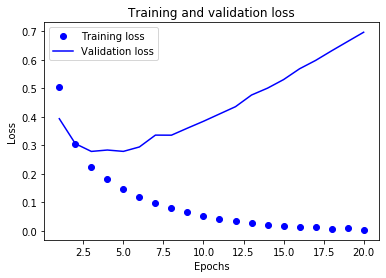

In [91]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 20+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

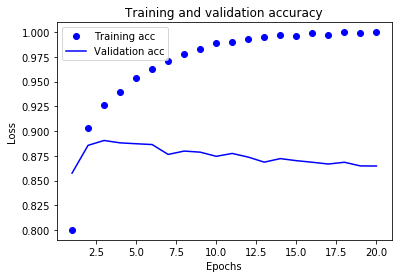

In [92]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [93]:
# Make predictions
model.predict(x_test)

array([[0.00657454],
       [0.99999976],
       [0.9918252 ],
       ...,
       [0.00133827],
       [0.05394202],
       [0.3355713 ]], dtype=float32)

In [96]:
# Retrain from scatch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results


Epoch 1/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.4783 - acc: 0.8172
Epoch 2/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.2771 - acc: 0.9086
Epoch 3/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.2105 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 2s 67us/step


[0.2980632256698608, 0.882]